In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import math


In [ ]:
boston_dataset= load_boston(return_X_y=False)
data = pd.DataFrame(boston_dataset.data)
max_val=max(data.max())
max_val = max(max_val,abs(min(data.min())))

data=data/max_val
val = pd.DataFrame(boston_dataset.target)
# data.insert(len(data.columns),len(data.columns),val)
data[len(data.columns)] = val
df = data
print(df)
a = np.array(df.values)
a = a[:,0:len(a[0])-1]
# print(a)
# print(len(a[0]))

           0         1         2    3   ...        10        11        12    13
0    0.000009  0.025316  0.003249  0.0  ...  0.021519  0.558228  0.007004  24.0
1    0.000038  0.000000  0.009944  0.0  ...  0.025035  0.558228  0.012855  21.6
2    0.000038  0.000000  0.009944  0.0  ...  0.025035  0.552504  0.005668  34.7
3    0.000046  0.000000  0.003066  0.0  ...  0.026301  0.555035  0.004135  33.4
4    0.000097  0.000000  0.003066  0.0  ...  0.026301  0.558228  0.007496  36.2
..        ...       ...       ...  ...  ...       ...       ...       ...   ...
501  0.000088  0.000000  0.016779  0.0  ...  0.029536  0.551322  0.013601  22.4
502  0.000064  0.000000  0.016779  0.0  ...  0.029536  0.558228  0.012771  20.6
503  0.000085  0.000000  0.016779  0.0  ...  0.029536  0.558228  0.007932  23.9
504  0.000154  0.000000  0.016779  0.0  ...  0.029536  0.553376  0.009114  22.0
505  0.000067  0.000000  0.016779  0.0  ...  0.029536  0.558228  0.011083  11.9

[506 rows x 14 columns]


In [ ]:

train_set, reamining_set = train_test_split(df,train_size = 0.3)
validation_set, test_set = train_test_split(df,train_size = 0.14)


print((train_set))

print((validation_set))
print((test_set))




           0         1         2    3   ...        10        11        12    13
79   0.000118  0.000000  0.018045  0.0  ...  0.026301  0.557046  0.012799  20.3
224  0.000444  0.000000  0.008720  0.0  ...  0.024473  0.541561  0.005823  44.8
271  0.000228  0.028129  0.009789  0.0  ...  0.026160  0.558228  0.009269  25.2
263  0.001161  0.028129  0.005584  0.0  ...  0.018284  0.553333  0.015823  31.0
328  0.000093  0.000000  0.004557  0.0  ...  0.023769  0.537890  0.014023  19.3
..        ...       ...       ...  ...  ...       ...       ...       ...   ...
425  0.022307  0.000000  0.025457  0.0  ...  0.028411  0.010802  0.034304   8.3
118  0.000184  0.000000  0.014079  0.0  ...  0.025035  0.476273  0.021617  20.4
459  0.009566  0.000000  0.025457  0.0  ...  0.028411  0.558228  0.020675  20.0
242  0.000145  0.042194  0.006934  0.0  ...  0.023347  0.524262  0.015781  22.2
473  0.006536  0.000000  0.025457  0.0  ...  0.028411  0.526976  0.016399  29.8

[151 rows x 14 columns]
           0   

In [ ]:
wi = ([random.randint(-3,3) for i in range(len(df.columns))])
print(wi)




[-3, 2, 3, 0, -3, -2, -3, 0, 3, 3, -3, 3, 1, 2]


inf


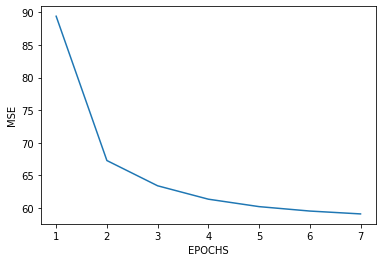

59.0895698428797


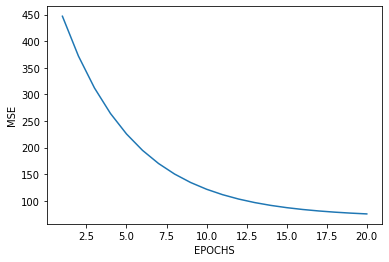

75.07790438921788


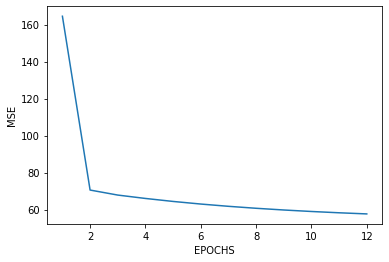

57.68253465797396


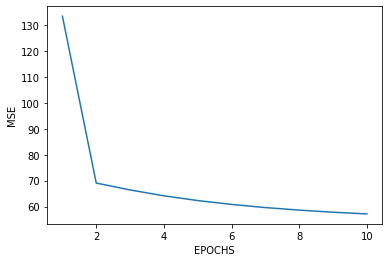

57.17211592064584


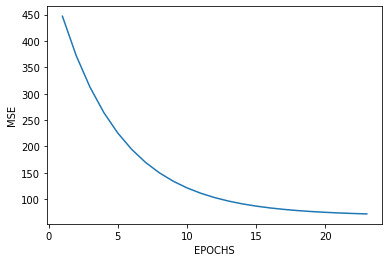

72.05544925333376
3


In [ ]:



def cal_MSE(df, alpha, rho, epochs):

  w = wi.copy()
  n = len(df.columns)-1 #features
  m = len(df) # patterns

  a = df.values

  col_names = list(df.columns)

  x = a[:,0:n]
  

  # output
  y = list(df[col_names[len(col_names)-1]])


  
  
  




  epoch_graph = []
  mse_graph = []
  

  itr = 1
  prevJ = 0
  currJ = 0
  

  while itr <= epochs :

    # print(itr)
    # predicted
    h = []

    J = 0

    for i in range(m):
      predicted_value = w[0]
      for j in range(1,len(w)):
        predicted_value = predicted_value + w[j]*(x[i][j-1])
      h.append(predicted_value)
      J = J + pow(predicted_value - y[i],2)
      for k in range(len(w)):
        if k==0:
          sum = 0
          sum = sum + h[i] - y[i]

          w[0] = w[0] - (alpha)*(sum)

        else:
          sum = 0
          sum = sum + (h[i]-y[i])*(x[i][k-1])

          w[k] = w[k] - (alpha)*(sum)

    J = J/(2*m)

    currJ = J
    

    mse_graph.append(J)
    epoch_graph.append(itr)

    if(abs(currJ - prevJ) < rho):
      break

    prevJ = currJ
    itr = itr + 1






  plt.plot(epoch_graph,mse_graph)
  plt.xlabel("EPOCHS")
  # naming the y axis
  plt.ylabel("MSE")
  plt.show()
    
  

  return [currJ,w]







alphaarr = np.array([0.1,0.001,0.02,0.03,0.001])
rhoarr = np.array([0.5,0.6,0.7,0.8,0.9])
epocharr = np.array([10,20,30,40,50])

minMSE = math.inf
minMSEindex = 0
print(minMSE)

minMSEw = []
for i in range(len(alphaarr)):
  p = cal_MSE(validation_set,alphaarr[i],rhoarr[i],epocharr[i])
  print(p[0])
  if(minMSE > p[0]):
    minMSE = p[0]
    minMSEindex = i
    minMSEw = p[1]

print(minMSEindex)



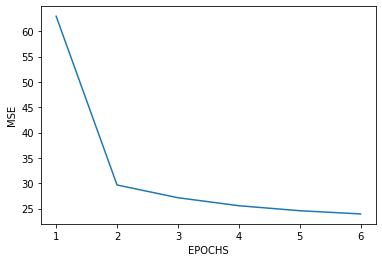

TrainMSE :  23.94007161864935
436
14
436
436
TestMSE :  25594.748807879405


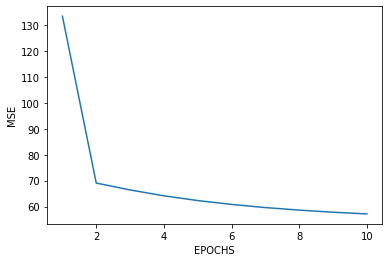

ValidationMSE :  [57.17211592064584, [21.378126949154606, 1.3189675271538233, 6.787200068759343, -0.6416039322819662, -2.978706780777225, -1.9976196037938336, -2.6057102947062023, -0.7211218123101913, 3.2312506216915517, 2.709702175484674, -7.988461716616432, 3.334649648628297, 17.12826150284216, 0.8708547556000095]]


In [ ]:
p = cal_MSE(train_set,alphaarr[minMSEindex],rhoarr[minMSEindex],epocharr[minMSEindex])
print('TrainMSE : ', p[0])
n = len(test_set.columns)-1 #features
m = len(test_set) # patterns
print(m)
minMSEw = p[1]
predicted_value = 0

df = test_set
a = df.values

col_names = list(df.columns)

x = a[:,0:n]
  

  # output
y = list(df[col_names[len(col_names)-1]])


J = 0
print(len(minMSEw))
print(m)
print(len(x))
for i in range(m):
  predicted_value = minMSEw[0]
  for j in range(1,len(minMSEw)):
    predicted_value = predicted_value + minMSEw[j]*(x[i][j-1])
  J = J + pow(predicted_value - y[i],2)

print('TestMSE : ', J)
print('ValidationMSE : ', cal_MSE(validation_set,alphaarr[minMSEindex],rhoarr[minMSEindex],epocharr[minMSEindex]))
